In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [35]:
from PIL import Image
nature = Image.open("../input/pics-for-lab/nature.jpeg")
nature = np.asarray(nature)
# nature = load_sample_image('flower.jpg')
nature = np.array(nature, dtype=np.float64) / 255

In [36]:
n_colours = [64, 32, 16, 8]
kmeans_arr = {}
labels_arr = {}

w, h, d = original_shape = tuple(nature.shape)
image_array = np.reshape(nature, (w * h, d))
for n_colour in n_colours: 
    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, n_samples=1_000)
    kmeans_arr[n_colour] = KMeans(n_clusters=n_colour).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels_arr[n_colour] =  kmeans_arr[n_colour].predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.315s.
Predicting color indices on the full image (k-means)
done in 0.044s.
Fitting model on a small sub-sample of the data
done in 0.207s.
Predicting color indices on the full image (k-means)
done in 0.028s.
Fitting model on a small sub-sample of the data
done in 0.124s.
Predicting color indices on the full image (k-means)
done in 0.019s.
Fitting model on a small sub-sample of the data
done in 0.106s.
Predicting color indices on the full image (k-means)
done in 0.014s.


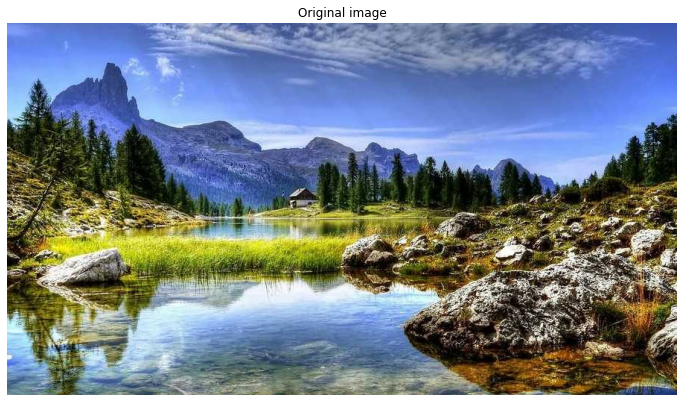

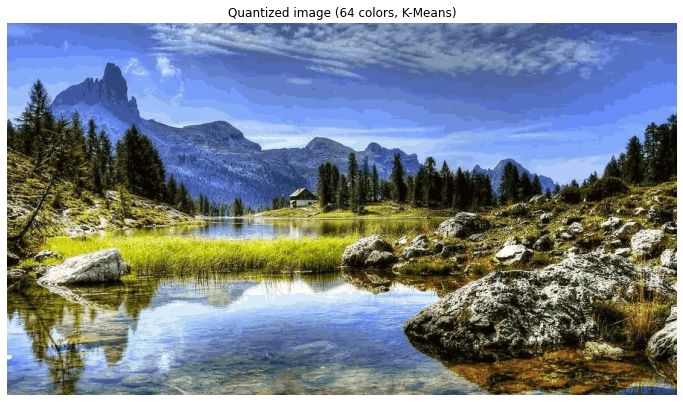

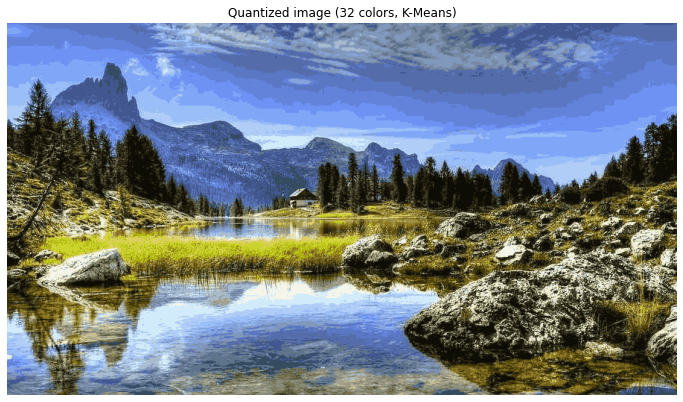

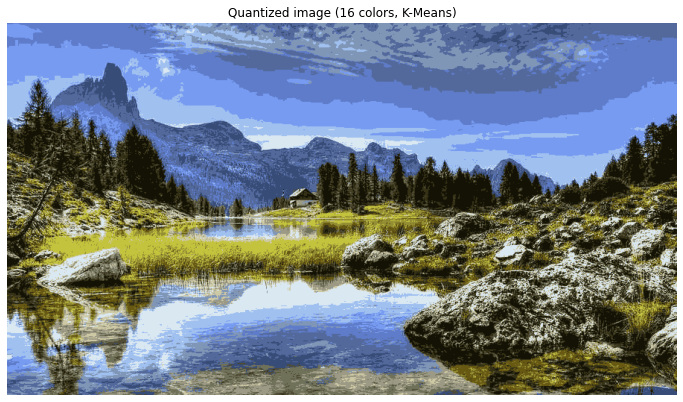

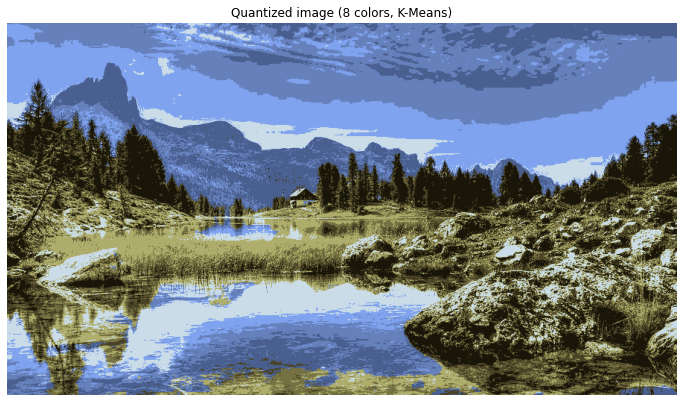

In [39]:
plt.figure(1, figsize=(12, 12))
plt.clf() 
plt.axis("off") 
plt.title("Original image") 
plt.imshow(nature)

for n in range(4): 
    plt.figure(n+2, figsize=(12, 12)) 
    plt.clf() 
    plt.axis("off") 
    plt.title(f"Quantized image ({n_colours[n]} colors, K-Means)")
    plt.imshow(kmeans_arr[n_colours[n]].cluster_centers_[labels_arr[n_colours[n]]].reshape(w, h, -1))